In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

In [8]:
data = pd.read_csv('cleaned_dataset_for_model.csv')


X = data.drop(['total_rewards'], axis=1)
y = data['total_rewards']

#Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Encode
label_encoder = LabelEncoder()
categorical_columns = ['first', 'last', 'category']

for col in categorical_columns:
    X_train[col] = label_encoder.fit_transform(X_train[col])
    X_test[col] = label_encoder.transform(X_test[col])

# Training
model = RandomForestRegressor(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [10]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Saveing
with open('model_evaluation.txt', 'w') as f:
    f.write(f"Mean Squared Error: {mse}\n")
    f.write(f"R-squared: {r2}\n")

predicted_rewards_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
predicted_rewards_df.to_csv('predicted_rewards.csv', index=False)

Mean Squared Error: 184675.8937413477
R-squared: 0.9996471468891474


In [12]:
#feature importances
importances = model.feature_importances_

#DataFrame for all feature importances
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

importance_df.to_csv('all_feature_importance.csv', index=False)

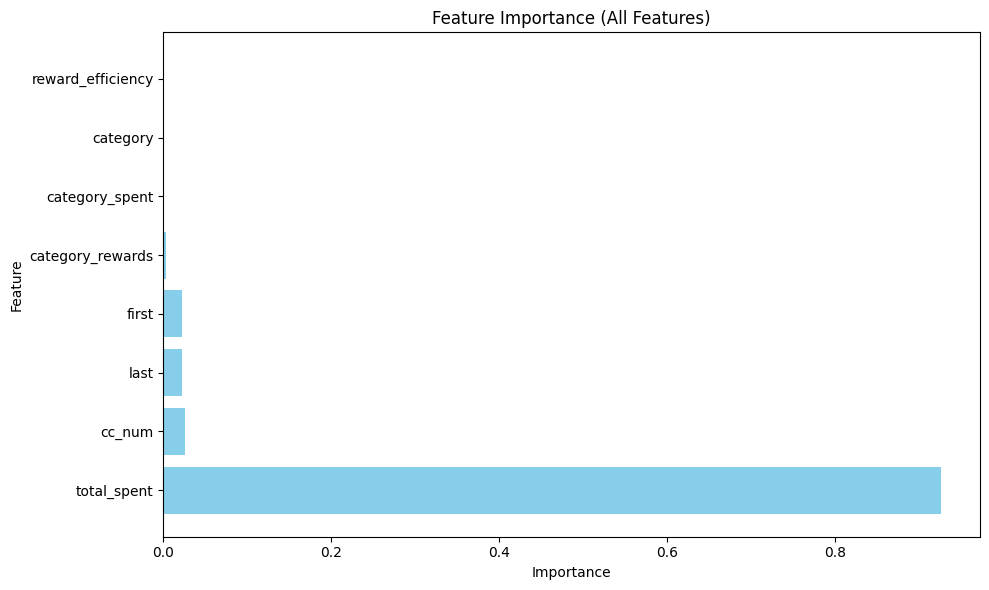

In [13]:
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance (All Features)')
plt.tight_layout()
plt.savefig('all_feature_importance.png')
plt.show()


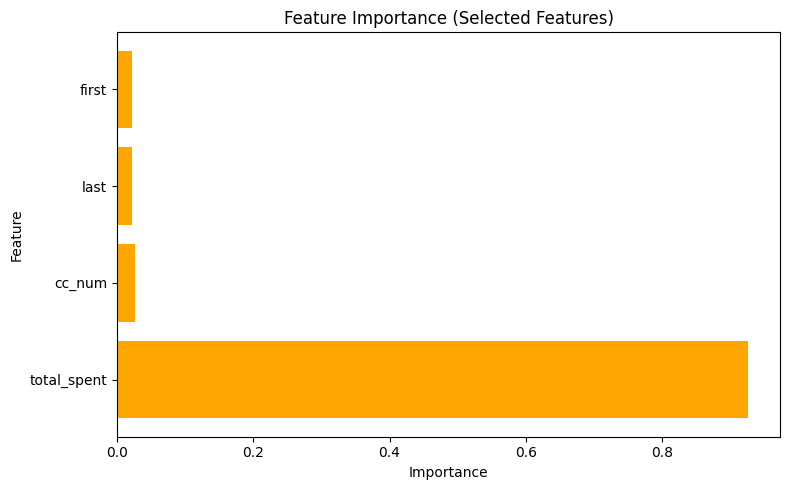

In [14]:
selected_features = ['first', 'last', 'cc_num', 'total_spent']
selected_importance_df = importance_df[importance_df['Feature'].isin(selected_features)]

selected_importance_df.to_csv('selected_feature_importance.csv', index=False)

plt.figure(figsize=(8, 5))
plt.barh(selected_importance_df['Feature'], selected_importance_df['Importance'], color='orange')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance (Selected Features)')
plt.tight_layout()
plt.savefig('selected_feature_importance.png')
plt.show()

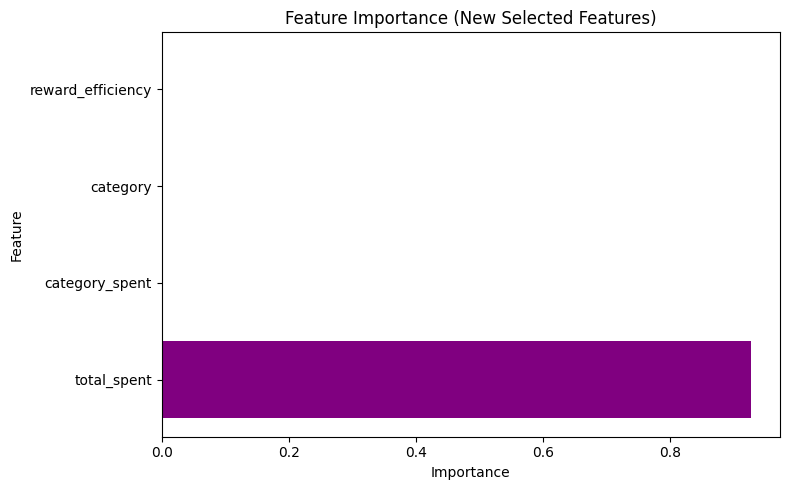

In [15]:
new_selected_features = ['category', 'category_spent', 'reward_efficiency', 'total_spent']

new_selected_importance_df = importance_df[importance_df['Feature'].isin(new_selected_features)]

new_selected_importance_df.to_csv('new_selected_feature_importance.csv', index=False)

plt.figure(figsize=(8, 5))
plt.barh(new_selected_importance_df['Feature'], new_selected_importance_df['Importance'], color='purple')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance (New Selected Features)')
plt.tight_layout()
plt.savefig('new_selected_feature_importance.png')
plt.show()
